In [86]:
import numpy as np 
import matplotlib.pyplot as plt
from util import viz_grid
from dataloader import data_loader,create_data_batch,read_cvd_numpy_data

%matplotlib inline
%load_ext autoreload
%autoreload 2

#0->no_atom, 1->2H, 2-1T, 3->defect 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [87]:
file_dir = 'ML_CVD'
i_start = 4000
i_end = 4020
profile, condition = data_loader(file_dir,i_start,i_end)
print("input data: ",profile.shape,condition.shape)

input data:  (20, 20, 50, 50) (20, 20, 4)


simulation number:  19 shape:  (20, 50, 50) unique val:  [0. 1. 2. 3.]


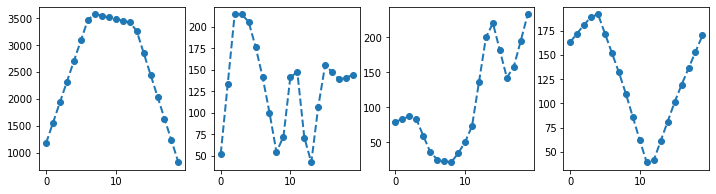

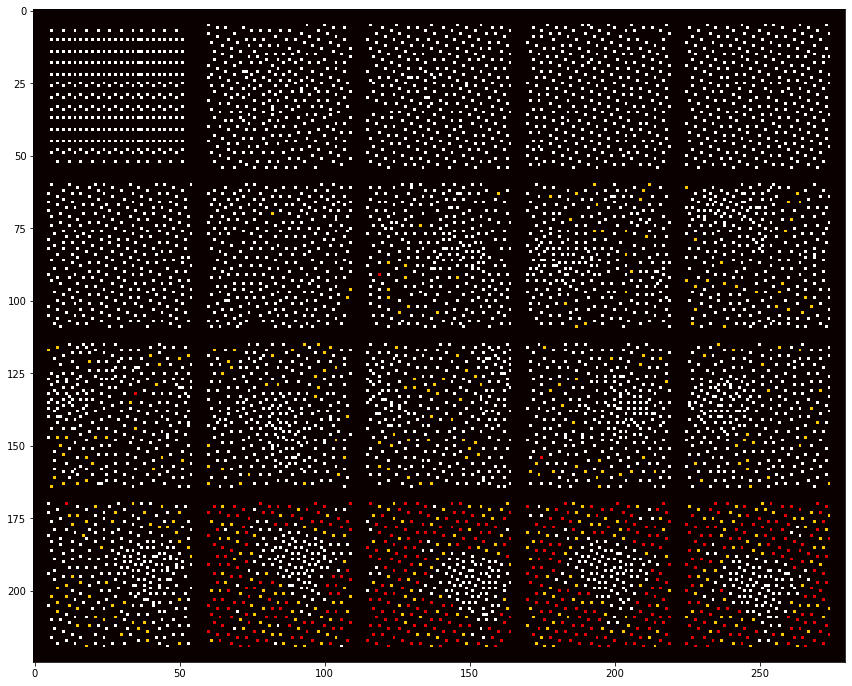

In [95]:
#0->no_atom, 1->2H, 2-1T, 3->defect 
sim_num = 19
sample_x = profile[sim_num]
print('simulation number: ',sim_num,'shape: ',sample_x.shape,'unique val: ',np.unique(sample_x))
fig, ax = plt.subplots(1,4,figsize=(12,3))
for i in range(4):
    ax[i].plot(condition[sim_num,:,i],marker='o', linestyle='dashed',linewidth=2, markersize=6)
plt.show()

fig = plt.figure(figsize = (16,12)) 
ax1 = plt.subplot(111)
ax1.imshow(viz_grid(sample_x, 5),cmap='hot')
plt.show()

In [ ]:
#Create Training Data
file_dir = 'ML_CVD'
i_start = 0    #2000
i_end =  5900     #4500
i_batch = 1475    #500
create_data_batch(file_dir,i_start,i_end,i_batch)

In [ ]:
X, Y = read_cvd_numpy_data(i_start,i_end,i_batch,file_dir='Data')
print(X.shape)
print(Y.shape)

In [ ]:
#code needed 
# 1) loader to read and create pytorch data
# 2) RNN/CNN model (CNN for Data and RNN for time series)
print(X.shape,Y.shape)
np.save('Data/CVD_Structure',X)
np.save('Data/CVD_Condition',Y)

In [3]:
#load training and test data set
Structure = np.load('Data/CVD_Structure.npy')
Condition = np.load('Data/CVD_Condition.npy')
print(Structure.shape,Condition.shape)

(5900, 20, 50, 50) (5900, 20, 4)


In [ ]:
#create training and test data
Nsamples = Structure.shape[0]
Split = 0.8
N_train = int(Split * Nsamples) + 16
N_test = Nsamples - N_train
shuffle = np.random.permutation(Nsamples)
print("creating a random permulation")
Structure_train_np = Structure[:N_train]
Condition_train_np = Condition[:N_train]
Structure_test_np = Structure[N_train:]
Condition_test_np = Condition[N_train:]
np.save('Data/Train/CVD_Structure',Structure_train_np)
np.save('Data/Train/CVD_Condition',Condition_train_np)
np.save('Data/Test/CVD_Structure',Structure_test_np)
np.save('Data/Test/CVD_Condition',Condition_test_np)
print(Nsamples,N_train,N_test,Structure_train_np.shape,Structure_test_np.shape)

In [15]:
diff_C = np.abs(Condition[:,1:,:]-Condition[:,0:-1,:])
print(diff_C.shape)
diff_C = diff_C.reshape(-1,4)
print(diff_C.shape)
print(diff_C.mean(axis=0))
print(diff_C.std(axis=0))
print("Maximum: ",Condition.reshape(-1,4).max(axis=0))
print("Minimum: ",Condition.reshape(-1,4).min(axis=0))

(5900, 19, 4)
(112100, 4)
[233.18058876  10.1837645   10.59882248   9.45366637]
[209.14140021  12.03161701  12.83035896  10.24510342]
Maximum:  [3747.  398.  396.  399.]
Minimum:  [750.   5.   5.   1.]


In [44]:
temp_mean = 200.0
gas_1 = 10.0
gas_2 = 10.0
gas_3 = 10.0
min_T = 750.0
max_T = 3500.0

(20,)


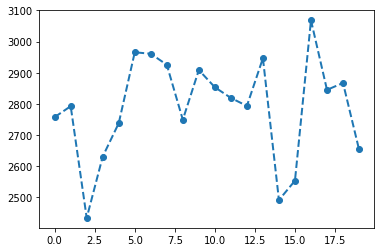

[2757.58398725 2792.58785803 2434.11973366 2631.02532164 2738.09501725
 2965.64832444 2960.8140326  2925.56591367 2749.1617406  2908.70443423
 2853.38880068 2819.14002976 2793.45038861 2946.54201116 2491.50013199
 2553.59626912 3068.4289337  2845.00503583 2867.21529407 2653.88521914]


In [50]:
temp = []
t0 = min_T + (max_T- min_T) * np.random.random()
temp.append(t0)
for j in range(19):
    t1 = np.random.normal(t0,temp_mean)
    if t1 < min_T:
        t1 = t0
    temp.append(t1)
temp = np.asarray(temp)
print(temp.shape)
plt.plot(temp,marker='o', linestyle='dashed',linewidth=2, markersize=6)
plt.show()
print(temp)

In [79]:
a = np.random.normal(900,temp_mean,size=32)
print(a.shape)

(32,)


In [80]:
a[a < 750.0] = 750.0

In [85]:
np.random.random(10)

array([0.61752528, 0.75107155, 0.54578501, 0.44718229, 0.06322722,
       0.91095451, 0.56743884, 0.35926698, 0.32940638, 0.69601705])